In [1]:
#Modification du dossier par défaut
import os
os.chdir('/Users/macbookair/Desktop/categorization/dataset')
#import file
import xlrd

In [2]:
# Analysis imports
import numpy as np
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import urllib
import io
from urllib.parse import urlencode, quote_plus
from urllib.request import Request, urlopen
import gzip
import json

In [3]:
dataset = pd.read_csv('datset2.csv',encoding='latin_1',sep = ',')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   article_title  300 non-null    object
 1   keyword        300 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [4]:
dataset

,article_title,keyword
0,17.5 An intrinsically linear wideband digital ...,intrinsically linear wideband digital polar pa...
1,3D Inception U-Net for Aorta Segmentation usin...,3d inception net segmentation using computed t...
2,A 20.5TOPS and 217.3GOPS/mm<sup>2</sup> Multic...,mm sup multicore soc dnn accelerator image sig...
3,A Birth-Death Process for Feature Allocation.,birth death process feature allocation
4,A Classroom Deployment of a Haptic System for ...,classroom deployment haptic system learning ce...
...,...,...
295,ZebraLancer: Private and Anonymous Crowdsourci...,private anonymous crowdsourcing system open bl...
296,[WiP] A Framework for Access Coordination in IoT.,framework access coordination iot
297,geMsearch: Personalized Explorative Music Search.,personalized music search
298,iStar4Safety: Uma ExtensÃ£o de iStar para Mode...,de istar em


In [71]:
rowData = dataset.loc[ 0 , : ]
rowData

article_title    17.5 An intrinsically linear wideband digital ...
keyword          intrinsically linear wideband digital polar pa...
Name: 0, dtype: object

In [5]:
dataset.index

RangeIndex(start=0, stop=300, step=1)

In [6]:
dict_df = dataset.to_dict()
dict_df

{'article_title': {0: '17.5 An intrinsically linear wideband digital polar PA featuring AM-AM and AM-PM corrections through nonlinear sizing. overdrive-voltage control. and multiphase RF clocking.',
  1: '3D Inception U-Net for Aorta Segmentation using Computed Tomography Cardiac Angiography.',
  2: 'A 20.5TOPS and 217.3GOPS/mm<sup>2</sup> Multicore SoC with DNN Accelerator and Image Signal Processor Complying with ISO26262 for Automotive Applications.',
  3: 'A Birth-Death Process for Feature Allocation.',
  4: 'A Classroom Deployment of a Haptic System for Learning Cell Biology.',
  5: 'A Comprehensive Analysis on Adversarial Robustness of Spiking Neural Networks.',
  6: 'A Conceptual Framework for Integrating Inclusive Design into Design Education.',
  7: 'A Concurrent Skip List Balanced on Search.',
  8: 'A Data Forwarding Approach for Opportunistic Mobile Sensor Networks in Fire-Rescue Scenario.',
  9: 'A Deterministic Compressive Sensing Approach for Compressed Domain Image Analy

In [13]:
cles, vals = zip(*dict_df.items())


In [7]:
cles = list(dict_df.keys())
vals = list(dict_df.values())

In [8]:
cles

['article_title', 'keyword']

In [9]:
vals[1]

{0: 'intrinsically linear wideband digital polar pa featuring pm corrections nonlinear sizing voltage control multiphase rf clocking',
 1: '3d inception net segmentation using computed tomography cardiac angiography',
 2: 'mm sup multicore soc dnn accelerator image signal processor automotive applications',
 3: 'birth death process feature allocation',
 4: 'classroom deployment haptic system learning cell biology',
 5: 'comprehensive analysis adversarial robustness spiking neural networks',
 6: 'conceptual framework integrating inclusive design education',
 7: 'concurrent skip list balanced search',
 8: 'data forwarding approach opportunistic mobile sensor networks fire rescue scenario',
 9: 'deterministic compressive sensing approach compressed domain image analysis deterministic compressive sensing approach compressed domain image analysis',
 10: 'fast accurate edge detection algorithm real time deep space autonomous optical navigation',
 11: 'gis tool estimate flow basins using map 

In [10]:
cles0, vals0 = list(vals[0].keys()),list(vals[0].values())
cles1, vals1 = list(vals[1].keys()),list(vals[1].values())

In [11]:
titres, keywords = list(vals[1].keys()),list(vals[1].values())

In [30]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(keywords)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
df['document'] = list(vals[0].keys())
df = df.set_index('document')

In [31]:
df

,13th,3d,6d,6th,absolute,abstract,abstraction,abstractive,abuse,ac,...,word,words,work,workers,workload,workshop,writing,yield,zero,zoom
document,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


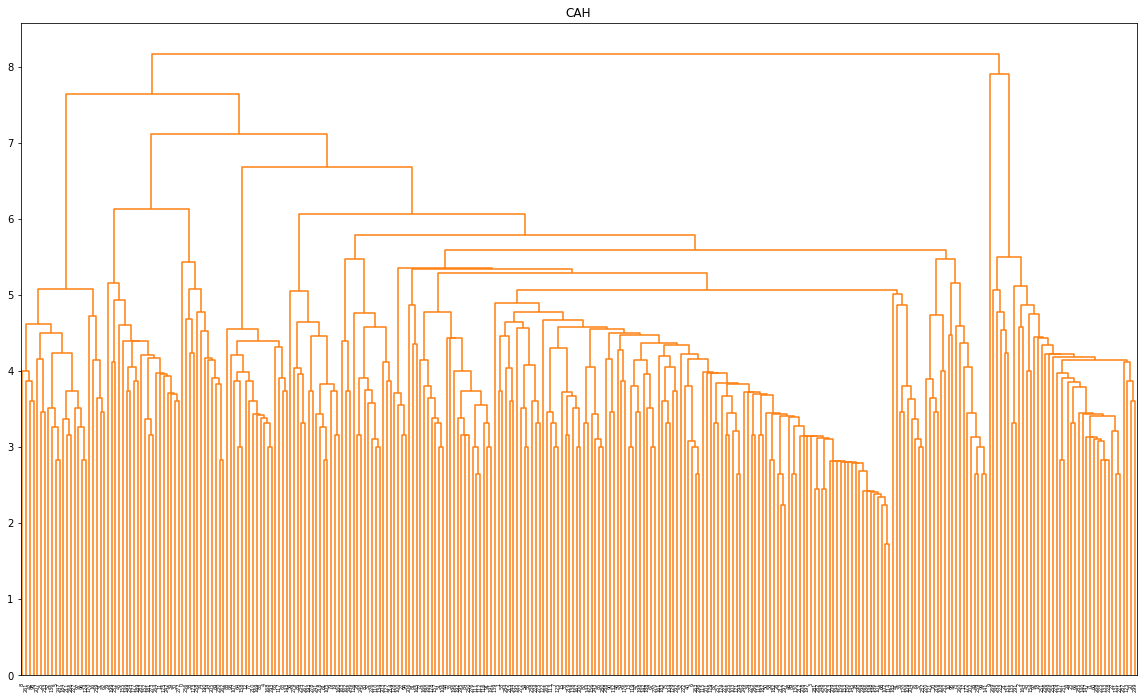

26 groupes constitués


In [32]:
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

#générer la matrice des liens 
#Z = linkage(df,method='single',metric='jaccard') 
Z = linkage(df,method='ward',metric='euclidean')

# génération et affichage du dendrogramme
plt.figure(figsize=(20,12))
plt.title("CAH") 

dendrogram(Z,labels=list(vals[0].keys()),color_threshold=100)

plt.show() 

groupes_cah = sch.fcluster(Z,t=5,criterion='distance') 
print(np.unique(groupes_cah).size, "groupes constitués")


In [33]:
print(groupes_cah)

[ 7 16 25 16  8  1 16 16  1 26 20  3  8 16  6 16  2 21 25  9 25 22 25 25
 25  1 16 13 12  4  3  2 12 16 16 15 17 17  5  3 16 17  1 25 15  3 16 16
 16 21 16 15  1 16 16 16 10 16 16 16 25  9  2  8  8  8 25 16 16  6 19 25
 15 21  6 16 17  8 16  9 12 14 16  8 15 16  9 16  8 16 16 15 25  8 13 20
  1  1  1 21 13 16 16 16 16  9 15  8 19 17 12 15 15 16 16 16 15  8 16 16
 17 19 16 25  1 16 12 12 13 16 16 25 16 25 12 24  1 25 16 16 25 21 16  8
 16 16 16 25 16  3 16 22  3 16 25  3 16 15  8 16  9 16 11 11 25 14 15 16
  8  8  2 16 21  5 16  3 16  3 15 16 15  3 16 16  1 18 16 16 16  3  6 15
 15  9 16 16 15 16 16  3 16 16 21 12 17  6 14  1 16 16  8  1 16 16 12 16
 19 16  9 16 19 16 16 22 16 25 12  1 25 25  6 25 19  1  9 16 25 17 16  2
 12  9  3 16 16 22 11  1 16 16 15 25  3 16  3 25  5 16  6 21 21  1  6 16
  3 16  1  9 25 23 16 25 16  3 16 16 15  3  9  9 16 16 16  3 16 25 16 25
 16 25 16 24 16  8 16 15 16 16 16 25]


In [34]:
#index triés des groupes
import numpy as np
idg = np.argsort(groupes_cah)


In [36]:
#affichage des observations et leurs groupes
dataf = pd.DataFrame(df.index[idg],groupes_cah[idg])
groupes = dataf
groupes['groupe'] = groupes.index
groupes

,document,groupe
1,261,1
1,227,1
1,211,1
1,207,1
1,25,1
...,...,...
25,255,25
25,268,25
25,22,25
25,299,25


In [20]:
groupes['groupe'].value_counts()

16    107
25     32
15     20
3      19
1      18
8      17
9      13
12     11
21      9
6       8
17      8
19      6
2       5
13      4
22      4
14      3
11      3
5       3
20      2
24      2
10      1
18      1
7       1
4       1
23      1
26      1
Name: groupe, dtype: int64

In [21]:
colors = ['blue','lawngreen','red','indigo', 'aqua', 'yellow','orange','black','purple','pink',
 'beige','chocolate','coral','crimson','cyan','fuchsia','gold','indigo','green','lime',
 'magenta','navy','olive','plum','salmon','green']

numbers = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]

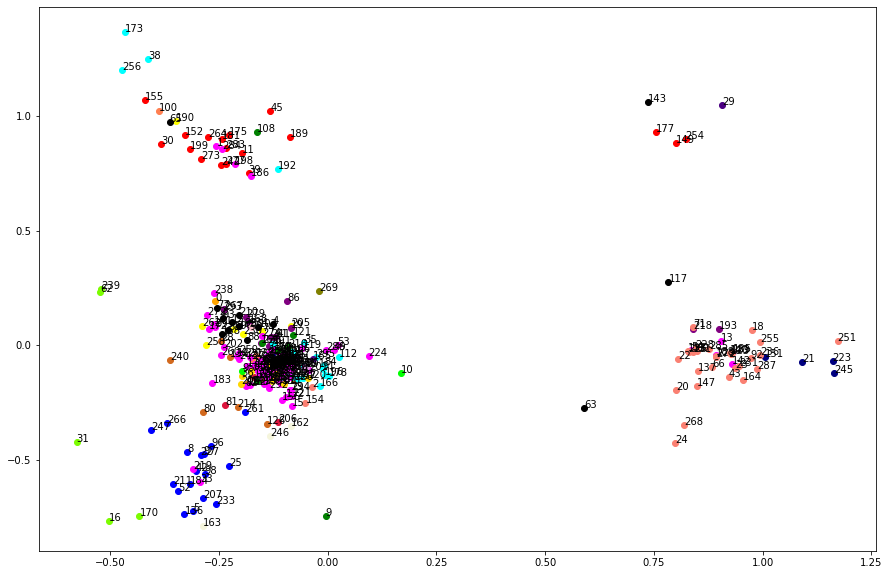

In [39]:
from sklearn.decomposition import PCA
#ACP
acp_subset = PCA(n_components=2).fit_transform(df)
#projeter dans le plan factoriel
#avec un code couleur selon le groupe
#remarquer le rôle de zip()
plt.figure(figsize=(15,10))
for couleur,k in zip(colors,numbers):
    plt.scatter(acp_subset[groupes_cah==k,0],acp_subset[groupes_cah==k,1],c=couleur)
    
#mettre les labels des points
#remarquer le rôle de enumerate()
for i,label in enumerate(df.index):
    plt.annotate(label,(acp_subset[i,0],acp_subset[i,1])) 
    
plt.show()

In [40]:
groupes.groupby(['groupe','document']).count()

Empty DataFrame
Columns: []
Index: [(1, 5), (1, 8), (1, 25), (1, 42), (1, 52), (1, 96), (1, 97), (1, 98), (1, 124), (1, 136), (1, 184), (1, 207), (1, 211), (1, 227), (1, 233), (1, 247), (1, 261), (1, 266), (2, 16), (2, 31), (2, 62), (2, 170), (2, 239), (3, 11), (3, 30), (3, 39), (3, 45), (3, 149), (3, 152), (3, 155), (3, 175), (3, 177), (3, 181), (3, 189), (3, 199), (3, 242), (3, 252), (3, 254), (3, 264), (3, 273), (3, 277), (3, 283), (4, 29), (5, 38), (5, 173), (5, 256), (6, 14), (6, 69), (6, 74), (6, 190), (6, 205), (6, 230), (6, 258), (6, 262), (7, 0), (8, 4), (8, 12), (8, 63), (8, 64), (8, 65), (8, 77), (8, 83), (8, 88), (8, 93), (8, 107), (8, 117), (8, 143), (8, 158), (8, 168), (8, 169), (8, 210), (8, 293), (9, 19), (9, 61), (9, 79), (9, 86), (9, 105), (9, 160), (9, 193), (9, 218), (9, 234), (9, 241), (9, 267), (9, 278), (9, 279), (10, 56), (11, 162), (11, 163), (11, 246), (12, 28), (12, 32), (12, 80), (12, 110), (12, 126), (12, 127), (12, 134), (12, 203), (12, 214), (12, 226), (12, 240), ...]

[300 rows x 0 columns]

In [41]:
elements = list(groupes.document)
titres=[]
keywords = []
for i in elements:
    rowData = dataset.loc[i, : ]
    titres.append(rowData['article_title'])
    keywords.append(rowData['keyword'])

In [42]:
groupes['titre_article'], groupes['keywords'] = titres, keywords

In [62]:
#groupes[['groupe', 'keywords']] 
groupes.groupby(['groupe','titre_article','keywords','document']).count().tail(50)

Empty DataFrame
Columns: []
Index: [(20, Detect in RGB. Optimize in Edge: Accurate 6D Pose Estimation for Texture-less Industrial Parts., detect rgb optimize edge accurate 6d pose estimation texture less industrial parts, 95), (21, A Semi-Blind Channel Estimation Algorithm for One-bit Massive MIMO Systems., semi blind channel estimation algorithm one bit massive mimo systems, 17), (21, Asynchronous testing of real-time systems., asynchronous testing real time systems, 49), (21, Comparative Characteristic Analysis of Circular and Double D Power Pads for Electric Vehicle Wireless Charging Systems., comparative characteristic analysis circular double power pads electric vehicle wireless charging systems, 73), (21, Differential Privacy Preservation for Smart Meter Systems., differential privacy preservation smart meter systems, 99), (21, Fuzzy-voting systems in smart cities., fuzzy voting systems smart cities, 141), (21, Literature review on smart lighting systems and their application in industrial settings., literature review smart lighting systems application industrial settings, 172), (21, On-Line State Estimation of 2-qubit Quantum Systems., line state estimation qubit quantum systems, 202), (21, Symposium: WISH - Workgroup on Interactive Systems in Healthcare., symposium interactive systems healthcare, 259), (21, Synchronization Tracking of a Class of Uncertain Nonidentical Networked Euler-Lagrange Systems on Directed Graphs., synchronization tracking class uncertain nonidentical networked euler lagrange systems directed graphs, 260), (22, A fast and ultra low power time-based spiking neuromorphic architecture for embedded applications., fast ultra low power time based spiking neuromorphic architecture embedded applications, 21), (22, Impacts of Linear Controllers for Power Interfaces in Ideal Transformer Model Based Power Hardware-in-the-Loop., impacts linear controllers power interfaces ideal transformer model based hardware loop, 151), (22, Real-Time Basic Principles Nuclear Reactor Simulator Based on Client-Server Network Architecture with WebBrowser as User Interface., real time basic principles nuclear simulator based client server network architecture user interface, 223), (22, Semi-Partitioned Scheduling of Dynamic Real-Time Workload: A Practical Approach Based on Analysis-Driven Load Balancing., semi partitioned scheduling dynamic real time workload practical approach based analysis driven load balancing, 245), (23, Time-varying formation control for general linear multi-agent systems with time-varying delays and switching topologies., time varying formation control general linear multi agent systems time delays switching topologies, 269), (24, Fashion Is Taking Shape: Understanding Clothing Preference Based on Body Shape From Online Sources., fashion taking shape understanding clothing preference based body online sources, 135), (24, What Dress Fits Me Best?: Fashion Recommendation on the Clothing Style for Personal Body Shape., fits best fashion recommendation clothing style personal body shape, 291), (25, A 20.5TOPS and 217.3GOPS/mm<sup>2</sup> Multicore SoC with DNN Accelerator and Image Signal Processor Complying with ISO26262 for Automotive Applications., mm sup multicore soc dnn accelerator image signal processor automotive applications, 2), (25, A Simulation Modeling Framework with Autonomous Vehicle Region-based Routing and Public Transit Diversion Integration., simulation modeling framework autonomous vehicle region based routing public transit integration, 18), (25, A document-based neural relevance model for effective clinical decision support., document based neural relevance model effective clinical decision support, 20), (25, A mobile cloud-based application for renal insufficiency patient monitoring., mobile cloud based application renal patient monitoring, 22), (25, A motion sensing based assistive system design for ice skating learners., motion sensing based assistive system design ice learners, 23

In [59]:
top1_groupe = groupes.groupby(['groupe'])['groupe','titre_article','keywords'].apply(lambda x: x.nlargest(1, columns=['groupe']))
top1_groupe

<ipython-input-59-51ce6f30d888>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top1_groupe = groupes.groupby(['groupe'])['groupe','titre_article','keywords'].apply(lambda x: x.nlargest(1, columns=['groupe']))


,,groupe,titre_article,keywords
groupe,,,,
1,1,1,Tackling Mobile Traffic Critical Path Analysis...,tackling mobile traffic critical path analysis...
2,2,2,Biomedical Event Extraction Using Convolutiona...,biomedical event extraction using convolutiona...
3,3,3,Low-cost IMU Data Denoising using Savitzky-Gol...,low cost imu data denoising using savitzky gol...
4,4,4,Achievable Throughput of Multiband Wireless LA...,achievable throughput multiband wireless lan u...
5,5,5,Supervisory Control of Energy Distribution at ...,supervisory control energy distribution autono...
6,6,6,Surfing with Sound: An Ethnography of the Art ...,surfing sound ethnography art input mixing sta...
7,7,7,17.5 An intrinsically linear wideband digital ...,intrinsically linear wideband digital polar pa...
8,8,8,Embedding-based Representation of Categorical ...,embedding based representation categorical dat...
9,9,9,Secure Similar Sequence Query on Outsourced Ge...,secure similar sequence query outsourced genom...


In [46]:
top1_groupe = top1_groupe[['groupe','titre_article','keywords']].set_index(top1_groupe['groupe'])

In [48]:
keywords = top1_groupe.loc[1,:]['keywords']
keywords

'tackling mobile traffic critical path analysis passive active measurements'

In [56]:
occ2

mot,critical path analysis
domains,
MATHEMATICS_AND_STATISTICS,1


In [49]:
def ngrames(sentence,n):
    ngramms = []
    ngrm = nltk.ngrams(sentence.split(), n)
    for grm in ngrm:
        ngramms.append(list(grm))
    return ngramms

In [60]:
trigrams = ngrames(keywords, 3)

cat_all = {'cat':[],'mot':[]}
cat_all = pd.DataFrame(data=cat_all)

domain_all = {'domains':[],'ratio':[],'mot':[]}
domain_all = pd.DataFrame(data=domain_all)
corbeill = ['MUSIC_SOUND_AND_DANCING',' MEDIA_AND_PRESS']

for i in trigrams:
    i = ' '.join(i)
    print(i)
    service_url = 'https://babelnet.io/v6/getSynsetIds'
    
    params = {
            'lemma' : i,
            'searchLang' : 'EN',
            'key'  : '1ed7054d-95e6-46f3-a86a-de79d654fb23'
    }
    
    url = service_url + '?' + urlencode(params)
    request = Request(url)
    request.add_header('Accept-encoding', 'gzip')
    response = urlopen(request)

    if response.info().get('Content-Encoding') == 'gzip':
        buf = io.BytesIO(response.read())
        f = gzip.GzipFile(fileobj=buf)
        data_ids = json.loads(f.read())

        
    ids = [d['id'] for d in data_ids]
    cat = []
    domains = []
    ratio = []
    for j in ids:
        service_url = 'https://babelnet.io/v6/getSynset'
        
        params = {
        'id' : j,
        'key'  : '1ed7054d-95e6-46f3-a86a-de79d654fb23'
        }
        
        url = service_url + '?' + urlencode(params)
        request = Request(url)
        request.add_header('Accept-encoding', 'gzip')
        response = urlopen(request)
        
        if response.info().get('Content-Encoding') == 'gzip':
            buf = io.BytesIO(response.read())
            f = gzip.GzipFile(fileobj=buf)
            data_cat = json.loads(f.read())
            cat = cat + data_cat['categories']
            domains=domains+list(data_cat['domains'].keys())
            ratio = ratio+list(data_cat['domains'].values())
            
    cat_art = [d['category'] for d in cat]
    domains_art = [d for d in domains]
    ratio_mot = [r for r in ratio]
    
    kw1 = [i]*len(cat_art)
    kw2 = [i]*len(domains_art)
    kw3 = [i]*len(ratio)
    
    df2 = {'cat':cat_art,'mot':kw1}
    df2 = pd.DataFrame(data=df2)
    cat_all = cat_all.append(df2)
    
    dfd = {'domains':domains_art,'ratio': ratio_mot, 'mot':kw2}
    dfd = pd.DataFrame(data=dfd)
    domain_all = domain_all.append(dfd)

occ1 = pd.crosstab(cat_all['cat'],cat_all['mot'])
occ2 = pd.crosstab(domain_all['domains'],domain_all['mot'])

tackling mobile traffic
mobile traffic critical
traffic critical path
critical path analysis
path analysis passive
analysis passive active
passive active measurements


In [61]:
occ2

mot,critical path analysis
domains,
MATHEMATICS_AND_STATISTICS,1


In [57]:
trigrams

[['tackling', 'mobile', 'traffic'],
 ['mobile', 'traffic', 'critical'],
 ['traffic', 'critical', 'path'],
 ['critical', 'path', 'analysis'],
 ['path', 'analysis', 'passive'],
 ['analysis', 'passive', 'active'],
 ['passive', 'active', 'measurements']]

In [58]:
domain_all

,domains,ratio,mot
0,MATHEMATICS_AND_STATISTICS,-2.0,critical path analysis
